In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [ ]:
df_index = pd.read_csv("Student_Performance.csv")
df_index.head()

,Hours_Studied,Previous_Scores,Extracurricular_Activities,Sleep_Hours,Sample_Question_Papers_Practiced,Performance_Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [7]:
#dropping unneccesorty column
df_index.drop(columns =  ["Extracurricular_Activities"], axis = 1, inplace = True)

In [8]:
df_index.head()

,Hours_Studied,Previous_Scores,Sleep_Hours,Sample_Question_Papers_Practiced,Performance_Index
0,7,99,9,1,91.0
1,4,82,4,2,65.0
2,8,51,7,2,45.0
3,5,52,5,2,36.0
4,7,75,8,5,66.0


In [9]:
df_index.isnull().sum()

Hours_Studied                       0
Previous_Scores                     0
Sleep_Hours                         0
Sample_Question_Papers_Practiced    0
Performance_Index                   0
dtype: int64

In [10]:
import seaborn as sns

In [11]:
sns.pairplot(df_index)

In [12]:
df_index.corr()
#Correlation measures the statistical relationship between two variables and is commonly used to understand how changes in one variable are associated with changes in another. Just like Slope

,Hours_Studied,Previous_Scores,Sleep_Hours,Sample_Question_Papers_Practiced,Performance_Index
Hours_Studied,1.000000,0.090749,-0.016524,-0.013727,0.472819
Previous_Scores,0.090749,1.000000,-0.036569,0.050002,0.913362
Sleep_Hours,-0.016524,-0.036569,1.000000,-0.017714,0.001142
Sample_Question_Papers_Practiced,-0.013727,0.050002,-0.017714,1.000000,0.075896
Performance_Index,0.472819,0.913362,0.001142,0.075896,1.000000


In [13]:
##Visualize datapoints More 
plt.scatter(df_index['Previous_Scores'], df_index["Performance_Index"], color = "r") #Checks relation of previous_score and Performance_Index
plt.xlabel("Previous_Scores")
plt.ylabel("Performance_Index")

Text(0, 0.5, 'Performance_Index')

In [ ]:
##Independent and dependent features
X = df_index.iloc[:,:-1]#All 
y = df_index.iloc[:, -1]#Performance [all, last_one]

In [15]:
X

,Hours_Studied,Previous_Scores,Sleep_Hours,Sample_Question_Papers_Practiced
0,7,99,9,1
1,4,82,4,2
2,8,51,7,2
3,5,52,5,2
4,7,75,8,5
...,...,...,...,...
94,5,82,9,8
95,3,48,7,5
96,8,64,5,1
97,6,95,6,7


In [16]:
y

0     91.0
1     65.0
2     45.0
3     36.0
4     66.0
      ... 
94    69.0
95    30.0
96    57.0
97    81.0
98    36.0
Name: Performance_Index, Length: 99, dtype: float64

In [11]:
##Train test Split
from sklearn.model_selection import train_test_split
X_train , X_test, y_train , y_test = train_test_split(X, y, test_size= 0.25, random_state=42)

In [12]:
import seaborn as sns

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [15]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [16]:
regression.fit(X_train , y_train )

LinearRegression()

In [17]:
from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(regression, X_train, y_train, scoring="neg_mean_squared_error", cv=3)

In [18]:
np.mean(validation_score)

-4.056156005881549

In [19]:
##Prediction
y_pred = regression.predict(X_test)

In [20]:
y_pred

array([85.61841719, 41.75277225, 19.57283416, 23.43422734, 83.56675733,
       68.92360561, 34.6240984 , 50.2631131 , 83.90611214, 90.7329583 ,
       27.03346232, 57.78862267, 50.85089631, 60.06394943, 68.1310381 ,
       63.68687473, 68.69015074, 18.29987222, 50.98560661, 49.48790659,
       49.40434789, 73.7122766 , 91.18468216, 42.61893794, 60.19350692])

In [17]:
#Importing mse, mae, rmse
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [22]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Mean square error", mse)
print("Mean absolute error", mae)
print("Root Mean square error", rmse)

Mean square error 24.107443209750674
Mean absolute error 3.919034077688981
Root Mean square error 4.909933116627015


In [23]:
from sklearn.metrics import r2_score

In [24]:
score = r2_score(y_test, y_pred)
score

0.9319693691140613

In [25]:
1-(1-score)*(len(y_test)-1)/(len(y_test) - X_test.shape[1]-1)

0.9183632429368735

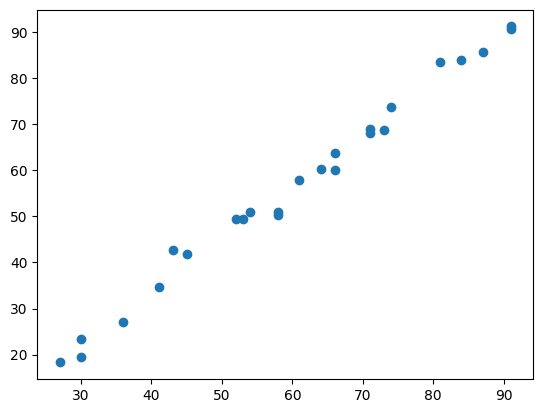

In [26]:
plt.scatter(y_test, y_pred)


In [27]:
residuals= y_test - y_pred
print(residuals)

62     1.381583
40     3.247228
95    10.427166
18     6.565773
97    -2.566757
84     2.076394
64     6.375902
42     7.736887
10     0.093888
0      0.267042
31     8.966538
76     3.211377
47     3.149104
26     5.936051
44     2.868962
4      2.313125
22     4.309849
12     8.700128
88     7.014393
73     2.512093
49     3.595652
70     0.287723
68    -0.184682
15     0.381062
39     3.806493
Name: Performance_Index, dtype: float64


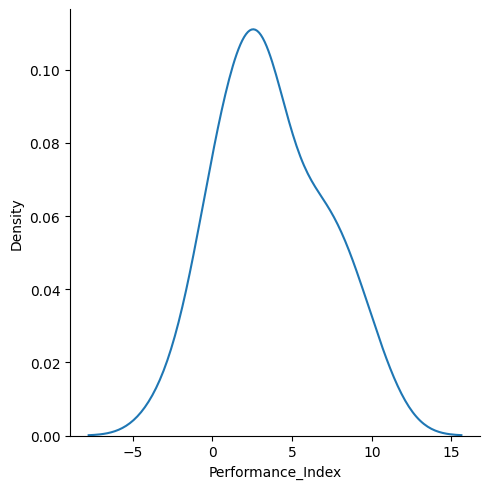

In [28]:
##Plottting residuals
sns.displot(residuals, kind= "kde")

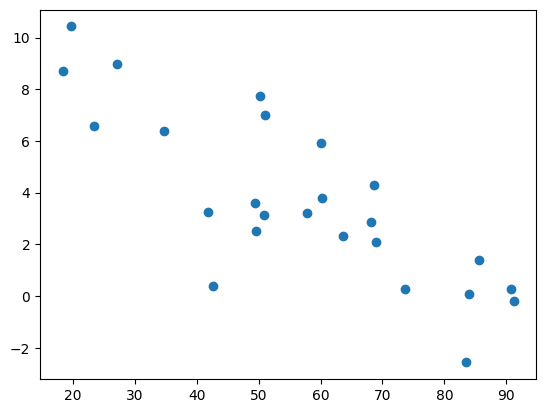

In [29]:
##Scatter plot with respect to prediction and residual
plt.scatter(y_pred, residuals)

In [30]:
import statsmodels.api as sm

In [31]:
model = sm.OLS(y_train , X_train).fit()

In [32]:
prediction = model.predict(X_test)
prediction

array([ 29.03733611, -14.82830883, -37.00824692, -33.14685374,
        26.98567625,  12.34252453, -21.95698268,  -6.31796798,
        27.32503106,  34.15187722, -29.54761876,   1.20754159,
        -5.73018477,   3.48286835,  11.54995702,   7.10579365,
        12.10906966, -38.28120886,  -5.59547447,  -7.0931745 ,
        -7.17673319,  17.13119552,  34.60360107, -13.96214314,
         3.61242584])

In [33]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:      Performance_Index   R-squared (uncentered):                   0.100
Model:                            OLS   Adj. R-squared (uncentered):              0.048
Method:                 Least Squares   F-statistic:                              1.940
Date:                Sun, 30 Jun 2024   Prob (F-statistic):                       0.113
Time:                        13:04:25   Log-Likelihood:                         -403.68
No. Observations:                  74   AIC:                                      815.4
Df Residuals:                      70   BIC:                                      824.6
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [34]:
print(regression.coef_)
print(regression.intercept_)

[ 7.54294673 17.21591608  0.64141642  0.75198848]
56.58108108108108
